In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpzutshjjl/pubring.gpg' created
gpg: /tmp/tmpzutshjjl/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!pip install -q keras

In [0]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [0]:
def load_data(data_path: str, test_size=0.2, random_state=42, info=False):
    """Load data from file.
    
    Args:
        data_path: str, file path to read data
        test_size: float, the ratio of test / all
        random_state: int, random seed to split data
        info: bool, control info print
    Returns:
        train_data: np.array, train set
        test_data: np.array, test set
    """
    # imgs = [np.array(Image.open(d)) for d in Path(data_path).iterdir()]
    imgs = []
    for d in Path(data_path).iterdir():
        if info:
            print('Load image: ' + d.name)
        imgs.append(np.array(Image.open(d)))
    data = np.array(imgs)
    train_data, test_data = train_test_split(
        data, test_size=test_size, random_state=random_state)
    return train_data, test_data

In [0]:
def load_label(label_path: str, test_size=0.2, random_state=42):
    """Load label from file.
    
    Args:
        label_path: str, file path to read label
        test_size: float, the ratio of test / all, 
            this arg should match up test_size in load_data
        random_state: int, random seed to split data
            this arg should match up random_state in load_data
    """
    with open(label_path, 'r') as f:
        labels = f.readline()
    train_label, test_label = train_test_split(
        labels.split('\t'), test_size=test_size, random_state=random_state)
    le = LabelEncoder()
    le.fit(train_label)
    return le.transform(train_label), le.transform(test_label)

In [0]:
train_label, test_label = load_label('./drive/data/FacePlace/Asian.txt')

In [5]:
train_data, test_data = load_data('./drive/data/FacePlace/Asian/', info=True)

Load image: AM0316_1101_90L.jpg
Load image: AM0316_1101_90R.jpg
Load image: AM0316_1101_NE.jpg
Load image: AM0316_2201_00F.jpg
Load image: AM0316_2201_30L.jpg
Load image: AM0316_2201_30R.jpg
Load image: AM0316_2201_45L.jpg
Load image: AM0316_1100_90R.jpg
Load image: AM0316_2201_45R.jpg
Load image: AM0316_1100_90L.jpg
Load image: AM0316_1101_45L.jpg
Load image: AM0316_1101_30R.jpg
Load image: AM0316_1101_30L.jpg
Load image: AM0316_1101_00F.jpg
Load image: AM0316_1101_45R.jpg
Load image: AM0316_1100_60R.jpg
Load image: AM0316_2201_60L.jpg
Load image: AM0317_1100_45L.jpg
Load image: AM0317_1100_60R.jpg
Load image: AM0317_1100_90L.jpg
Load image: AM0317_1100_90R.jpg
Load image: AM0317_1100_NE.jpg
Load image: AM0316_2201_90R.jpg
Load image: AM0317_2201_00F.jpg
Load image: AM0316_2201_NE.jpg
Load image: AM0317_1100_30L.jpg
Load image: AM0317_1100_30R.jpg
Load image: AM0316_2201_60R.jpg
Load image: AM0317_1100_45R.jpg
Load image: AM0317_1100_60L.jpg
Load image: AM0317_1100_00F.jpg
Load image:

Load image: AF0331_1100_00F.jpg
Load image: AF0330_2101_60L.jpg
Load image: AF0331_1100_30L.jpg
Load image: AF0331_1101_30R.jpg
Load image: AF0331_1100_30R.jpg
Load image: AF0331_1100_90R.jpg
Load image: AF0331_1101_30L.jpg
Load image: AF0331_1100_45L.jpg
Load image: AF0331_1100_90L.jpg
Load image: AF0331_1100_60R.jpg
Load image: AF0331_1101_00F.jpg
Load image: AF0331_1101_45L.jpg
Load image: AF0331_1100_60L.jpg
Load image: AF0331_1100_45R.jpg
Load image: AF0331_1101_45R.jpg
Load image: AF0331_2201_45R.jpg
Load image: AF0331_1101_60L.jpg
Load image: AF0331_1101_90R.jpg
Load image: AF0331_1101_90L.jpg
Load image: AF0331_1101_NE.jpg
Load image: AF0331_2201_30L.jpg
Load image: AF0331_2201_30R.jpg
Load image: AF0331_2201_45L.jpg
Load image: AF0331_1101_60R.jpg
Load image: AF0331_2201_00F.jpg
Load image: AF0331_2201_60L.jpg
Load image: AF0331_2201_60R.jpg
Load image: AF0331_2201_90L.jpg
Load image: AF0332_1110_60R.jpg
Load image: AF0331_2201_90R.jpg
Load image: AF0332_1110_45L.jpg
Load imag

Load image: AF0309_1100_DI.jpg
Load image: AF0309_1100_HA.jpg
Load image: AF0309_1100_NE.jpg
Load image: AF0309_1100_SA.jpg
Load image: AF0309_1100_SU.jpg
Load image: AF0309_2201_00F.jpg
Load image: AF0309_2201_30L.jpg
Load image: AF0309_2201_30R.jpg
Load image: AF0309_2201_45L.jpg
Load image: AF0309_1100_30R.jpg
Load image: AF0309_2201_45R.jpg
Load image: AF0309_2201_60L.jpg
Load image: AF0309_2201_60R.jpg
Load image: AF0309_1100_60L.jpg
Load image: AF0309_1100_45L.jpg
Load image: AF0309_1100_90L.jpg
Load image: AF0309_1100_90R.jpg
Load image: AF0309_1100_60R.jpg
Load image: AF0309_1100_45R.jpg
Load image: AF0309_1100_CO.jpg
Load image: AF0309_2201_90L.jpg
Load image: AF0310_1101_90L.jpg
Load image: AF0309_2201_90R.jpg
Load image: AF0310_1101_30R.jpg
Load image: AF0310_1101_60R.jpg
Load image: AF0310_1101_45L.jpg
Load image: AF0309_2201_NE.jpg
Load image: AF0310_1101_00F.jpg
Load image: AF0310_1101_30L.jpg
Load image: AF0310_1101_90R.jpg
Load image: AF0310_1101_45R.jpg
Load image: AF0

In [0]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
train_label, val_label = train_test_split(train_label, test_size=0.2, random_state=42)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # randomly flip images
datagen.fit(train_data)

In [0]:
from keras import layers
from keras import models
from keras import optimizers

In [0]:
def vanilia_cnn(input_shape: tuple, classes: int):
    """Implement vanilia ConvNet model."""
    model = models.Sequential()
    model.add(
        layers.Conv2D(32, (3, 3), activation='relu',
                      padding='same',
                      input_shape=input_shape))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [0]:
model = vanilia_cnn(input_shape=train_data[0].shape, classes=train_label.max() + 1)

In [12]:
history = model.fit_generator(
    datagen.flow(train_data, train_label, batch_size=32),
    epochs=200, validation_data=(val_data, val_label))

Epoch 1/200
26/26 [==============================] - 40s 2s/step - loss: 4.4311 - acc: 0.0265 - val_loss: 3.9675 - val_acc: 0.0243
Epoch 2/200
26/26 [==============================] - 21s 812ms/step - loss: 3.9609 - acc: 0.0409 - val_loss: 3.9959 - val_acc: 0.0243
Epoch 3/200
26/26 [==============================] - 21s 812ms/step - loss: 3.9080 - acc: 0.0415 - val_loss: 4.0884 - val_acc: 0.0097
Epoch 4/200
26/26 [==============================] - 21s 815ms/step - loss: 3.6940 - acc: 0.0583 - val_loss: 5.2744 - val_acc: 0.0194
Epoch 5/200
26/26 [==============================] - 21s 813ms/step - loss: 3.4636 - acc: 0.0872 - val_loss: 7.2057 - val_acc: 0.0194
Epoch 6/200
26/26 [==============================] - 21s 810ms/step - loss: 3.2849 - acc: 0.1112 - val_loss: 7.7531 - val_acc: 0.0194
Epoch 7/200
26/26 [==============================] - 21s 812ms/step - loss: 3.1479 - acc: 0.1245 - val_loss: 10.1743 - val_acc: 0.0194
Epoch 8/200
 6/26 [=====>........................] - ETA: 14s - 

26/26 [==============================] - 21s 809ms/step - loss: 3.0161 - acc: 0.1569 - val_loss: 10.7128 - val_acc: 0.0194
Epoch 9/200
26/26 [==============================] - 21s 812ms/step - loss: 2.9127 - acc: 0.1894 - val_loss: 11.5301 - val_acc: 0.0194
Epoch 10/200
26/26 [==============================] - 21s 813ms/step - loss: 2.8518 - acc: 0.2099 - val_loss: 12.4909 - val_acc: 0.0194
Epoch 11/200
26/26 [==============================] - 21s 812ms/step - loss: 2.7329 - acc: 0.2165 - val_loss: 13.7711 - val_acc: 0.0194
Epoch 12/200
26/26 [==============================] - 21s 808ms/step - loss: 2.7106 - acc: 0.2339 - val_loss: 14.7454 - val_acc: 0.0194
Epoch 13/200
26/26 [==============================] - 21s 810ms/step - loss: 2.5807 - acc: 0.2646 - val_loss: 13.2227 - val_acc: 0.0194
Epoch 14/200
26/26 [==============================] - 22s 840ms/step - loss: 2.5134 - acc: 0.2634 - val_loss: 14.0883 - val_acc: 0.0194
Epoch 15/200
 7/26 [=======>......................] - ETA: 14s

26/26 [==============================] - 21s 812ms/step - loss: 2.4326 - acc: 0.3031 - val_loss: 15.2081 - val_acc: 0.0194
Epoch 16/200
26/26 [==============================] - 21s 813ms/step - loss: 2.4045 - acc: 0.3139 - val_loss: 15.1956 - val_acc: 0.0194
Epoch 17/200
26/26 [==============================] - 21s 812ms/step - loss: 2.2645 - acc: 0.3422 - val_loss: 15.4265 - val_acc: 0.0194
Epoch 18/200
26/26 [==============================] - 21s 810ms/step - loss: 2.2470 - acc: 0.3319 - val_loss: 15.5671 - val_acc: 0.0194
Epoch 19/200
26/26 [==============================] - 21s 812ms/step - loss: 2.0484 - acc: 0.3806 - val_loss: 15.3802 - val_acc: 0.0194
Epoch 20/200
26/26 [==============================] - 21s 811ms/step - loss: 2.0148 - acc: 0.3999 - val_loss: 15.1333 - val_acc: 0.0194
Epoch 21/200
26/26 [==============================] - 21s 812ms/step - loss: 1.9525 - acc: 0.4197 - val_loss: 15.4913 - val_acc: 0.0194
Epoch 22/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 809ms/step - loss: 1.9617 - acc: 0.4017 - val_loss: 15.2184 - val_acc: 0.0194
Epoch 23/200
26/26 [==============================] - 21s 814ms/step - loss: 1.8874 - acc: 0.4378 - val_loss: 15.5380 - val_acc: 0.0194
Epoch 24/200
26/26 [==============================] - 21s 813ms/step - loss: 1.8864 - acc: 0.4336 - val_loss: 15.4973 - val_acc: 0.0194
Epoch 25/200
26/26 [==============================] - 21s 812ms/step - loss: 1.7661 - acc: 0.4498 - val_loss: 15.3827 - val_acc: 0.0194
Epoch 26/200
26/26 [==============================] - 21s 815ms/step - loss: 1.7472 - acc: 0.4594 - val_loss: 15.3903 - val_acc: 0.0194
Epoch 27/200
26/26 [==============================] - 21s 815ms/step - loss: 1.6159 - acc: 0.4883 - val_loss: 15.5081 - val_acc: 0.0194
Epoch 28/200
26/26 [==============================] - 21s 812ms/step - loss: 1.5607 - acc: 0.5123 - val_loss: 15.5436 - val_acc: 0.0194
Epoch 29/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 813ms/step - loss: 1.4445 - acc: 0.5232 - val_loss: 15.4491 - val_acc: 0.0194
Epoch 30/200
26/26 [==============================] - 21s 812ms/step - loss: 1.4783 - acc: 0.5364 - val_loss: 15.3820 - val_acc: 0.0194
Epoch 31/200
26/26 [==============================] - 21s 812ms/step - loss: 1.4294 - acc: 0.5598 - val_loss: 15.6479 - val_acc: 0.0194
Epoch 32/200
26/26 [==============================] - 21s 814ms/step - loss: 1.3655 - acc: 0.5677 - val_loss: 15.6613 - val_acc: 0.0194
Epoch 33/200
26/26 [==============================] - 21s 814ms/step - loss: 1.2980 - acc: 0.5689 - val_loss: 15.3665 - val_acc: 0.0194
Epoch 34/200
26/26 [==============================] - 21s 813ms/step - loss: 1.2971 - acc: 0.5929 - val_loss: 15.5909 - val_acc: 0.0194
Epoch 35/200
26/26 [==============================] - 21s 814ms/step - loss: 1.2444 - acc: 0.6061 - val_loss: 15.3962 - val_acc: 0.0194
Epoch 36/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 812ms/step - loss: 1.1739 - acc: 0.6314 - val_loss: 15.4931 - val_acc: 0.0194
Epoch 37/200
26/26 [==============================] - 21s 812ms/step - loss: 1.1180 - acc: 0.6578 - val_loss: 15.5065 - val_acc: 0.0194
Epoch 38/200
26/26 [==============================] - 21s 812ms/step - loss: 1.1308 - acc: 0.6164 - val_loss: 15.6462 - val_acc: 0.0194
Epoch 39/200
26/26 [==============================] - 21s 815ms/step - loss: 1.1259 - acc: 0.6368 - val_loss: 15.4265 - val_acc: 0.0194
Epoch 40/200
26/26 [==============================] - 21s 813ms/step - loss: 1.1399 - acc: 0.6344 - val_loss: 15.6751 - val_acc: 0.0194
Epoch 41/200
26/26 [==============================] - 21s 809ms/step - loss: 1.0726 - acc: 0.6578 - val_loss: 15.6535 - val_acc: 0.0194
Epoch 42/200
26/26 [==============================] - 21s 814ms/step - loss: 1.0247 - acc: 0.6831 - val_loss: 15.4160 - val_acc: 0.0194
Epoch 43/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 810ms/step - loss: 1.1003 - acc: 0.6458 - val_loss: 15.5186 - val_acc: 0.0194
Epoch 44/200
26/26 [==============================] - 21s 812ms/step - loss: 0.9351 - acc: 0.6921 - val_loss: 15.6065 - val_acc: 0.0194
Epoch 45/200
26/26 [==============================] - 21s 812ms/step - loss: 0.9660 - acc: 0.6903 - val_loss: 15.5762 - val_acc: 0.0194
Epoch 46/200
26/26 [==============================] - 21s 810ms/step - loss: 0.9867 - acc: 0.6903 - val_loss: 15.5458 - val_acc: 0.0194
Epoch 47/200
26/26 [==============================] - 21s 811ms/step - loss: 0.8458 - acc: 0.7192 - val_loss: 15.6094 - val_acc: 0.0194
Epoch 48/200
26/26 [==============================] - 21s 810ms/step - loss: 0.8697 - acc: 0.7132 - val_loss: 15.5499 - val_acc: 0.0194
Epoch 49/200
26/26 [==============================] - 21s 813ms/step - loss: 0.8306 - acc: 0.7234 - val_loss: 15.5619 - val_acc: 0.0194
Epoch 50/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 813ms/step - loss: 0.8761 - acc: 0.7084 - val_loss: 15.5686 - val_acc: 0.0194
Epoch 51/200
26/26 [==============================] - 21s 811ms/step - loss: 0.8627 - acc: 0.7198 - val_loss: 15.3451 - val_acc: 0.0194
Epoch 52/200
26/26 [==============================] - 21s 812ms/step - loss: 0.7850 - acc: 0.7462 - val_loss: 15.5303 - val_acc: 0.0194
Epoch 53/200
26/26 [==============================] - 21s 811ms/step - loss: 0.8026 - acc: 0.7234 - val_loss: 15.4631 - val_acc: 0.0194
Epoch 54/200
26/26 [==============================] - 21s 813ms/step - loss: 0.7055 - acc: 0.7619 - val_loss: 15.5162 - val_acc: 0.0194
Epoch 55/200
26/26 [==============================] - 21s 813ms/step - loss: 0.7679 - acc: 0.7240 - val_loss: 15.5322 - val_acc: 0.0194
Epoch 56/200
26/26 [==============================] - 21s 813ms/step - loss: 0.7638 - acc: 0.7480 - val_loss: 15.8017 - val_acc: 0.0194
Epoch 57/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 811ms/step - loss: 0.6630 - acc: 0.7877 - val_loss: 15.7364 - val_acc: 0.0194
Epoch 58/200
26/26 [==============================] - 21s 812ms/step - loss: 0.6858 - acc: 0.7709 - val_loss: 15.5489 - val_acc: 0.0194
Epoch 59/200
26/26 [==============================] - 21s 814ms/step - loss: 0.6499 - acc: 0.7805 - val_loss: 15.4211 - val_acc: 0.0194
Epoch 60/200
26/26 [==============================] - 21s 813ms/step - loss: 0.6530 - acc: 0.7733 - val_loss: 15.6096 - val_acc: 0.0194
Epoch 61/200
26/26 [==============================] - 21s 813ms/step - loss: 0.6308 - acc: 0.7769 - val_loss: 15.7451 - val_acc: 0.0194
Epoch 62/200
26/26 [==============================] - 21s 813ms/step - loss: 0.6661 - acc: 0.7685 - val_loss: 15.4160 - val_acc: 0.0194
Epoch 63/200
26/26 [==============================] - 21s 814ms/step - loss: 0.6104 - acc: 0.7925 - val_loss: 15.4880 - val_acc: 0.0194
Epoch 64/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 812ms/step - loss: 0.5916 - acc: 0.8106 - val_loss: 15.4728 - val_acc: 0.0194
Epoch 65/200
26/26 [==============================] - 21s 812ms/step - loss: 0.6392 - acc: 0.7998 - val_loss: 15.4882 - val_acc: 0.0194
Epoch 66/200
26/26 [==============================] - 21s 812ms/step - loss: 0.5853 - acc: 0.7955 - val_loss: 15.6894 - val_acc: 0.0194
Epoch 67/200
26/26 [==============================] - 21s 812ms/step - loss: 0.5425 - acc: 0.8124 - val_loss: 15.4766 - val_acc: 0.0194
Epoch 68/200
26/26 [==============================] - 21s 810ms/step - loss: 0.6018 - acc: 0.7974 - val_loss: 15.5589 - val_acc: 0.0194
Epoch 69/200
26/26 [==============================] - 21s 815ms/step - loss: 0.5221 - acc: 0.8256 - val_loss: 15.5799 - val_acc: 0.0194
Epoch 70/200
26/26 [==============================] - 21s 809ms/step - loss: 0.5252 - acc: 0.8196 - val_loss: 15.6905 - val_acc: 0.0194
Epoch 71/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 814ms/step - loss: 0.5501 - acc: 0.7992 - val_loss: 15.5064 - val_acc: 0.0194
Epoch 72/200
26/26 [==============================] - 21s 813ms/step - loss: 0.4634 - acc: 0.8412 - val_loss: 15.3886 - val_acc: 0.0243
Epoch 73/200
26/26 [==============================] - 21s 815ms/step - loss: 0.5191 - acc: 0.8304 - val_loss: 15.5160 - val_acc: 0.0194
Epoch 74/200
26/26 [==============================] - 21s 811ms/step - loss: 0.5696 - acc: 0.7956 - val_loss: 15.6622 - val_acc: 0.0194
Epoch 75/200
26/26 [==============================] - 21s 815ms/step - loss: 0.4643 - acc: 0.8515 - val_loss: 15.3522 - val_acc: 0.0194
Epoch 76/200
26/26 [==============================] - 21s 813ms/step - loss: 0.5029 - acc: 0.8268 - val_loss: 15.7927 - val_acc: 0.0194
Epoch 77/200
26/26 [==============================] - 21s 814ms/step - loss: 0.5697 - acc: 0.7986 - val_loss: 15.5708 - val_acc: 0.0194
Epoch 78/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 811ms/step - loss: 0.4645 - acc: 0.8316 - val_loss: 15.3760 - val_acc: 0.0194
Epoch 79/200
26/26 [==============================] - 21s 814ms/step - loss: 0.4793 - acc: 0.8328 - val_loss: 15.4801 - val_acc: 0.0194
Epoch 80/200
26/26 [==============================] - 21s 812ms/step - loss: 0.4684 - acc: 0.8479 - val_loss: 15.4866 - val_acc: 0.0194
Epoch 81/200
26/26 [==============================] - 21s 824ms/step - loss: 0.5299 - acc: 0.7973 - val_loss: 15.6934 - val_acc: 0.0194
Epoch 82/200
26/26 [==============================] - 21s 813ms/step - loss: 0.4139 - acc: 0.8635 - val_loss: 15.8036 - val_acc: 0.0194
Epoch 83/200
26/26 [==============================] - 21s 813ms/step - loss: 0.5148 - acc: 0.8136 - val_loss: 15.8051 - val_acc: 0.0194
Epoch 84/200
26/26 [==============================] - 21s 814ms/step - loss: 0.3794 - acc: 0.8653 - val_loss: 15.8006 - val_acc: 0.0194
Epoch 85/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 813ms/step - loss: 0.3970 - acc: 0.8551 - val_loss: 15.6310 - val_acc: 0.0194
Epoch 86/200
26/26 [==============================] - 21s 813ms/step - loss: 0.4117 - acc: 0.8623 - val_loss: 15.6184 - val_acc: 0.0194
Epoch 87/200
26/26 [==============================] - 21s 812ms/step - loss: 0.5164 - acc: 0.8322 - val_loss: 15.5673 - val_acc: 0.0194
Epoch 88/200
26/26 [==============================] - 21s 815ms/step - loss: 0.3884 - acc: 0.8779 - val_loss: 15.4840 - val_acc: 0.0194
Epoch 89/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3566 - acc: 0.8707 - val_loss: 15.8051 - val_acc: 0.0194
Epoch 90/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3751 - acc: 0.8797 - val_loss: 15.8019 - val_acc: 0.0194
Epoch 91/200
26/26 [==============================] - 21s 815ms/step - loss: 0.4303 - acc: 0.8503 - val_loss: 15.4918 - val_acc: 0.0194
Epoch 92/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 813ms/step - loss: 0.4172 - acc: 0.8563 - val_loss: 15.5346 - val_acc: 0.0194
Epoch 93/200
26/26 [==============================] - 21s 815ms/step - loss: 0.3992 - acc: 0.8653 - val_loss: 15.6172 - val_acc: 0.0194
Epoch 94/200
26/26 [==============================] - 21s 816ms/step - loss: 0.3535 - acc: 0.8833 - val_loss: 15.2870 - val_acc: 0.0291
Epoch 95/200
26/26 [==============================] - 21s 815ms/step - loss: 0.4538 - acc: 0.8442 - val_loss: 15.8048 - val_acc: 0.0194
Epoch 96/200
26/26 [==============================] - 21s 813ms/step - loss: 0.4094 - acc: 0.8797 - val_loss: 15.7541 - val_acc: 0.0194
Epoch 97/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3804 - acc: 0.8858 - val_loss: 15.7277 - val_acc: 0.0194
Epoch 98/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3806 - acc: 0.8779 - val_loss: 15.8051 - val_acc: 0.0194
Epoch 99/200
 7/26 [=======>......................] - ETA: 14

26/26 [==============================] - 21s 813ms/step - loss: 0.3637 - acc: 0.8731 - val_loss: 15.7905 - val_acc: 0.0194
Epoch 100/200
26/26 [==============================] - 21s 811ms/step - loss: 0.3878 - acc: 0.8659 - val_loss: 15.7574 - val_acc: 0.0194
Epoch 101/200
26/26 [==============================] - 21s 813ms/step - loss: 0.4078 - acc: 0.8473 - val_loss: 15.7512 - val_acc: 0.0194
Epoch 102/200
26/26 [==============================] - 21s 813ms/step - loss: 0.4110 - acc: 0.8647 - val_loss: 15.6356 - val_acc: 0.0194
Epoch 103/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3684 - acc: 0.8713 - val_loss: 15.7215 - val_acc: 0.0194
Epoch 104/200
26/26 [==============================] - 21s 813ms/step - loss: 0.3425 - acc: 0.8930 - val_loss: 15.6455 - val_acc: 0.0194
Epoch 105/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3276 - acc: 0.8803 - val_loss: 15.5757 - val_acc: 0.0194
Epoch 106/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 811ms/step - loss: 0.3264 - acc: 0.8821 - val_loss: 15.8051 - val_acc: 0.0194
Epoch 107/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3272 - acc: 0.8875 - val_loss: 15.8051 - val_acc: 0.0194
Epoch 108/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3572 - acc: 0.8773 - val_loss: 15.7647 - val_acc: 0.0194
Epoch 109/200
26/26 [==============================] - 21s 811ms/step - loss: 0.3932 - acc: 0.8533 - val_loss: 15.7714 - val_acc: 0.0194
Epoch 110/200
26/26 [==============================] - 21s 820ms/step - loss: 0.3016 - acc: 0.8948 - val_loss: 15.7932 - val_acc: 0.0194
Epoch 111/200
26/26 [==============================] - 21s 811ms/step - loss: 0.2810 - acc: 0.9014 - val_loss: 15.7938 - val_acc: 0.0194
Epoch 112/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3315 - acc: 0.8864 - val_loss: 15.6883 - val_acc: 0.0194
Epoch 113/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 811ms/step - loss: 0.3357 - acc: 0.8984 - val_loss: 15.6621 - val_acc: 0.0194
Epoch 114/200
26/26 [==============================] - 21s 814ms/step - loss: 0.2695 - acc: 0.9008 - val_loss: 15.7346 - val_acc: 0.0194
Epoch 115/200
26/26 [==============================] - 21s 813ms/step - loss: 0.2944 - acc: 0.8912 - val_loss: 15.7934 - val_acc: 0.0194
Epoch 116/200
26/26 [==============================] - 21s 815ms/step - loss: 0.2769 - acc: 0.9050 - val_loss: 15.7712 - val_acc: 0.0194
Epoch 117/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3309 - acc: 0.8912 - val_loss: 15.5359 - val_acc: 0.0194
Epoch 118/200
26/26 [==============================] - 21s 813ms/step - loss: 0.2909 - acc: 0.8972 - val_loss: 15.6683 - val_acc: 0.0194
Epoch 119/200
26/26 [==============================] - 21s 813ms/step - loss: 0.2914 - acc: 0.8954 - val_loss: 15.6899 - val_acc: 0.0194
Epoch 120/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 813ms/step - loss: 0.2965 - acc: 0.8990 - val_loss: 15.5774 - val_acc: 0.0194
Epoch 121/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2927 - acc: 0.8900 - val_loss: 15.5230 - val_acc: 0.0194
Epoch 122/200
26/26 [==============================] - 21s 812ms/step - loss: 0.3348 - acc: 0.8851 - val_loss: 15.5817 - val_acc: 0.0194
Epoch 123/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2768 - acc: 0.9038 - val_loss: 15.6104 - val_acc: 0.0194
Epoch 124/200
26/26 [==============================] - 21s 814ms/step - loss: 0.2600 - acc: 0.9212 - val_loss: 15.5136 - val_acc: 0.0194
Epoch 125/200
26/26 [==============================] - 21s 814ms/step - loss: 0.3198 - acc: 0.8954 - val_loss: 15.2973 - val_acc: 0.0194
Epoch 126/200
26/26 [==============================] - 21s 808ms/step - loss: 0.2942 - acc: 0.9014 - val_loss: 15.6368 - val_acc: 0.0194
Epoch 127/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 809ms/step - loss: 0.2475 - acc: 0.9122 - val_loss: 15.6216 - val_acc: 0.0194
Epoch 128/200
26/26 [==============================] - 21s 810ms/step - loss: 0.2447 - acc: 0.9218 - val_loss: 15.6448 - val_acc: 0.0194
Epoch 129/200
26/26 [==============================] - 21s 811ms/step - loss: 0.2269 - acc: 0.9122 - val_loss: 15.6463 - val_acc: 0.0194
Epoch 130/200
26/26 [==============================] - 21s 811ms/step - loss: 0.3140 - acc: 0.8882 - val_loss: 15.4780 - val_acc: 0.0194
Epoch 131/200
26/26 [==============================] - 21s 813ms/step - loss: 0.2911 - acc: 0.8972 - val_loss: 15.5047 - val_acc: 0.0194
Epoch 132/200
26/26 [==============================] - 21s 811ms/step - loss: 0.2866 - acc: 0.9080 - val_loss: 15.5231 - val_acc: 0.0194
Epoch 133/200
26/26 [==============================] - 21s 814ms/step - loss: 0.2470 - acc: 0.9182 - val_loss: 15.5372 - val_acc: 0.0194
Epoch 134/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 812ms/step - loss: 0.2408 - acc: 0.9098 - val_loss: 14.9912 - val_acc: 0.0243
Epoch 135/200
26/26 [==============================] - 21s 813ms/step - loss: 0.2852 - acc: 0.9146 - val_loss: 15.1721 - val_acc: 0.0243
Epoch 136/200
26/26 [==============================] - 21s 813ms/step - loss: 0.2860 - acc: 0.9056 - val_loss: 15.4886 - val_acc: 0.0194
Epoch 137/200
26/26 [==============================] - 21s 810ms/step - loss: 0.2367 - acc: 0.9062 - val_loss: 15.6413 - val_acc: 0.0194
Epoch 138/200
26/26 [==============================] - 21s 809ms/step - loss: 0.2676 - acc: 0.9026 - val_loss: 15.7953 - val_acc: 0.0194
Epoch 139/200
26/26 [==============================] - 21s 811ms/step - loss: 0.3033 - acc: 0.9080 - val_loss: 15.7773 - val_acc: 0.0194
Epoch 140/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2715 - acc: 0.9104 - val_loss: 15.5238 - val_acc: 0.0194
Epoch 141/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 813ms/step - loss: 0.1718 - acc: 0.9453 - val_loss: 15.5620 - val_acc: 0.0194
Epoch 142/200
26/26 [==============================] - 21s 814ms/step - loss: 0.1922 - acc: 0.9296 - val_loss: 15.5638 - val_acc: 0.0194
Epoch 143/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2155 - acc: 0.9278 - val_loss: 15.5675 - val_acc: 0.0194
Epoch 144/200
26/26 [==============================] - 21s 810ms/step - loss: 0.2810 - acc: 0.9194 - val_loss: 14.3867 - val_acc: 0.0194
Epoch 145/200
26/26 [==============================] - 21s 810ms/step - loss: 0.2569 - acc: 0.9104 - val_loss: 15.7190 - val_acc: 0.0194
Epoch 146/200
26/26 [==============================] - 21s 813ms/step - loss: 0.2581 - acc: 0.9080 - val_loss: 15.1717 - val_acc: 0.0243
Epoch 147/200
26/26 [==============================] - 21s 814ms/step - loss: 0.2442 - acc: 0.9158 - val_loss: 14.8295 - val_acc: 0.0243
Epoch 148/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 813ms/step - loss: 0.2589 - acc: 0.9098 - val_loss: 15.6203 - val_acc: 0.0194
Epoch 149/200
26/26 [==============================] - 21s 813ms/step - loss: 0.2538 - acc: 0.9086 - val_loss: 15.2708 - val_acc: 0.0194
Epoch 150/200
26/26 [==============================] - 21s 815ms/step - loss: 0.2982 - acc: 0.8900 - val_loss: 14.9307 - val_acc: 0.0243
Epoch 151/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2122 - acc: 0.9284 - val_loss: 15.4385 - val_acc: 0.0194
Epoch 152/200
26/26 [==============================] - 21s 813ms/step - loss: 0.1882 - acc: 0.9369 - val_loss: 15.3281 - val_acc: 0.0194
Epoch 153/200
26/26 [==============================] - 21s 810ms/step - loss: 0.1973 - acc: 0.9393 - val_loss: 15.4953 - val_acc: 0.0194
Epoch 154/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2377 - acc: 0.9212 - val_loss: 14.6324 - val_acc: 0.0340
Epoch 155/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 809ms/step - loss: 0.2740 - acc: 0.9134 - val_loss: 14.9253 - val_acc: 0.0243
Epoch 156/200
26/26 [==============================] - 21s 810ms/step - loss: 0.2248 - acc: 0.9188 - val_loss: 14.8094 - val_acc: 0.0146
Epoch 157/200
26/26 [==============================] - 21s 811ms/step - loss: 0.2135 - acc: 0.9254 - val_loss: 15.2295 - val_acc: 0.0194
Epoch 158/200
26/26 [==============================] - 21s 814ms/step - loss: 0.2357 - acc: 0.9110 - val_loss: 15.2476 - val_acc: 0.0194
Epoch 159/200
26/26 [==============================] - 21s 810ms/step - loss: 0.1832 - acc: 0.9405 - val_loss: 15.2922 - val_acc: 0.0243
Epoch 160/200
26/26 [==============================] - 21s 812ms/step - loss: 0.1826 - acc: 0.9441 - val_loss: 15.1389 - val_acc: 0.0243
Epoch 161/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2495 - acc: 0.9291 - val_loss: 15.2162 - val_acc: 0.0194
Epoch 162/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 811ms/step - loss: 0.2054 - acc: 0.9303 - val_loss: 14.9786 - val_acc: 0.0291
Epoch 163/200
26/26 [==============================] - 21s 813ms/step - loss: 0.1991 - acc: 0.9393 - val_loss: 15.1428 - val_acc: 0.0194
Epoch 164/200
26/26 [==============================] - 21s 810ms/step - loss: 0.2711 - acc: 0.9182 - val_loss: 15.0719 - val_acc: 0.0243
Epoch 165/200
26/26 [==============================] - 21s 810ms/step - loss: 0.2433 - acc: 0.9194 - val_loss: 14.9801 - val_acc: 0.0291
Epoch 166/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2028 - acc: 0.9369 - val_loss: 14.9042 - val_acc: 0.0194
Epoch 167/200
26/26 [==============================] - 21s 809ms/step - loss: 0.2097 - acc: 0.9309 - val_loss: 15.0691 - val_acc: 0.0194
Epoch 168/200
26/26 [==============================] - 21s 813ms/step - loss: 0.1658 - acc: 0.9363 - val_loss: 15.2269 - val_acc: 0.0194
Epoch 169/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 812ms/step - loss: 0.1478 - acc: 0.9495 - val_loss: 15.3047 - val_acc: 0.0194
Epoch 170/200
26/26 [==============================] - 21s 814ms/step - loss: 0.1942 - acc: 0.9345 - val_loss: 14.9042 - val_acc: 0.0291
Epoch 171/200
26/26 [==============================] - 21s 808ms/step - loss: 0.2685 - acc: 0.9122 - val_loss: 14.8569 - val_acc: 0.0243
Epoch 172/200
26/26 [==============================] - 21s 814ms/step - loss: 0.2042 - acc: 0.9315 - val_loss: 15.0767 - val_acc: 0.0194
Epoch 173/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2196 - acc: 0.9170 - val_loss: 14.9935 - val_acc: 0.0291
Epoch 174/200
26/26 [==============================] - 21s 810ms/step - loss: 0.1937 - acc: 0.9290 - val_loss: 14.4016 - val_acc: 0.0194
Epoch 175/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2463 - acc: 0.9284 - val_loss: 14.6028 - val_acc: 0.0243
Epoch 176/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 811ms/step - loss: 0.2536 - acc: 0.9158 - val_loss: 14.5293 - val_acc: 0.0340
Epoch 177/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2187 - acc: 0.9296 - val_loss: 14.8154 - val_acc: 0.0243
Epoch 178/200
26/26 [==============================] - 21s 811ms/step - loss: 0.2044 - acc: 0.9291 - val_loss: 14.6322 - val_acc: 0.0291
Epoch 179/200
26/26 [==============================] - 21s 812ms/step - loss: 0.1881 - acc: 0.9350 - val_loss: 14.7513 - val_acc: 0.0340
Epoch 180/200
26/26 [==============================] - 21s 812ms/step - loss: 0.1986 - acc: 0.9291 - val_loss: 14.7672 - val_acc: 0.0243
Epoch 181/200
26/26 [==============================] - 21s 812ms/step - loss: 0.1699 - acc: 0.9453 - val_loss: 15.0551 - val_acc: 0.0194
Epoch 182/200
26/26 [==============================] - 21s 820ms/step - loss: 0.2073 - acc: 0.9230 - val_loss: 14.6890 - val_acc: 0.0243
Epoch 183/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 811ms/step - loss: 0.1963 - acc: 0.9333 - val_loss: 14.3397 - val_acc: 0.0291
Epoch 184/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2065 - acc: 0.9254 - val_loss: 14.6600 - val_acc: 0.0291
Epoch 185/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2441 - acc: 0.9050 - val_loss: 14.4401 - val_acc: 0.0194
Epoch 186/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2445 - acc: 0.9182 - val_loss: 15.5202 - val_acc: 0.0194
Epoch 187/200
26/26 [==============================] - 21s 811ms/step - loss: 0.1977 - acc: 0.9351 - val_loss: 15.3288 - val_acc: 0.0243
Epoch 188/200
26/26 [==============================] - 21s 814ms/step - loss: 0.1890 - acc: 0.9441 - val_loss: 15.7646 - val_acc: 0.0194
Epoch 189/200
26/26 [==============================] - 21s 811ms/step - loss: 0.2223 - acc: 0.9296 - val_loss: 15.0522 - val_acc: 0.0243
Epoch 190/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 810ms/step - loss: 0.1476 - acc: 0.9507 - val_loss: 13.7031 - val_acc: 0.0194
Epoch 191/200
26/26 [==============================] - 21s 811ms/step - loss: 0.1651 - acc: 0.9345 - val_loss: 15.1381 - val_acc: 0.0194
Epoch 192/200
26/26 [==============================] - 21s 813ms/step - loss: 0.1511 - acc: 0.9543 - val_loss: 15.3659 - val_acc: 0.0243
Epoch 193/200
26/26 [==============================] - 21s 812ms/step - loss: 0.2052 - acc: 0.9291 - val_loss: 15.5356 - val_acc: 0.0194
Epoch 194/200
26/26 [==============================] - 21s 811ms/step - loss: 0.2241 - acc: 0.9296 - val_loss: 15.2469 - val_acc: 0.0243
Epoch 195/200
26/26 [==============================] - 21s 809ms/step - loss: 0.2257 - acc: 0.9254 - val_loss: 14.8605 - val_acc: 0.0243
Epoch 196/200
26/26 [==============================] - 21s 809ms/step - loss: 0.1800 - acc: 0.9368 - val_loss: 14.5857 - val_acc: 0.0243
Epoch 197/200
 7/26 [=======>......................] - 

26/26 [==============================] - 21s 811ms/step - loss: 0.1347 - acc: 0.9459 - val_loss: 14.9150 - val_acc: 0.0340
Epoch 198/200
26/26 [==============================] - 21s 812ms/step - loss: 0.1870 - acc: 0.9333 - val_loss: 15.2063 - val_acc: 0.0194
Epoch 199/200
26/26 [==============================] - 21s 820ms/step - loss: 0.2081 - acc: 0.9315 - val_loss: 15.1920 - val_acc: 0.0243
Epoch 200/200
26/26 [==============================] - 21s 814ms/step - loss: 0.1457 - acc: 0.9531 - val_loss: 14.8042 - val_acc: 0.0291


In [0]:
model.save('./drive/asian_vanilia3.h5')

In [0]:
import matplotlib.pyplot as plt

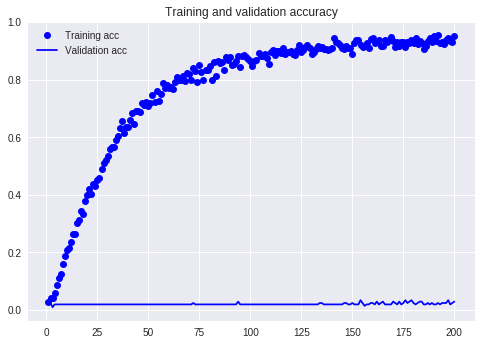

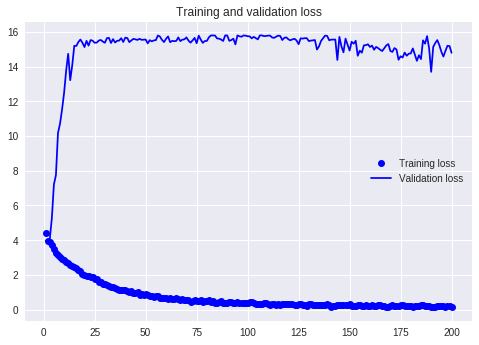

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
result = model.evaluate(test_data, test_label)